# Tenth Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/TenthSession.ipynb)

## A very fast recap on Wiener Process

A Wiener process $W_{t}$ is continous time continous space stochastic process such that:
- $W_{0}=0$
- $W_{t+u}-W_{t}$ is independent from $W_{t}$ $\forall u\ge 0$ (indipendence on increments property)
- $W_{t+u}-W_{t} \sim Normal(0,u)$
- $W_{t}$ is continous in $t$

Question time!! How could we sample from it?

Answer: We can recursively sample from a Normal distribution, in fact note that let 
$$\{t_{0}^{(n)}=0,.t_{i}^{(n)}=\frac{it}{n}...,t_{n}^{(n)}=t\}$$ then $n+1$ uniform grid on $[0,t].$

Then $W_{t}=\sum\limits_{i=1}^{n}W_{t_{i}}-W_{t_{i-1}}$.
But $$\xi_{i}^{(n)}:=W_{t_{i}^{(n)}}-W_{t_{i-1}^{(n)}}\sim Normal(t_{i}^{(n)
}-t_{i-1}^{(n)})\sim Normal(0,\frac{t}{n})$$.

Taking the limit we have
$$W_{t}=\lim\limits_{n\rightarrow+\infty}\sum\limits _{i=1}^{n}\xi_{i}^{n}:=\int\limits_{0}^{t} dW$$.
The integral quantity is called the Ito integral.



## Exercise 
1) Write a function that takes the number of samples $m$ and the number of discretization points $N=n+1$ and return $m$ samples on a Wiener process on the discretization points using only numpy in at most four lines of code. Let's take for simplicity $t=1$. (Tip: exploit the independence of increments property.)
2) Write a function that takes the number of samples $m$ and the number of discretization points $N=n+1$ and return $m$ samples and returns the sample covariance matrix using only numpy in at most three lines of code. You can use the function of the previous point.
3) Write a function that s the number of samples $m$ and the number of discretization points $n$  and returns the error between the sample covariance matrix and the covariance matrix.
4) Plot the error of the sample covariance matrix with increasing $m$ and $N=10$
3) Plot $M=100$ samples of a wiener process with $N=100000$

In [1]:
import numpy as np
def sample_wiener(m,N):
    n=N-1
    xi=np.random.randn(n,m)*(1/np.sqrt(n))
    w=np.cumsum(xi,axis=0)
    w=np.concatenate((np.zeros((1,m)),w))
    return w


def sample_covariance(m,N):
    w=sample_wiener(m,N)
    matrix=np.cov(w)
    return matrix





Remember that the covariance of a Wiener process $C$ at times $t_{0},...,t_{n}$ is $$C_{i,j}=\min (t_{i},t_{j})$$

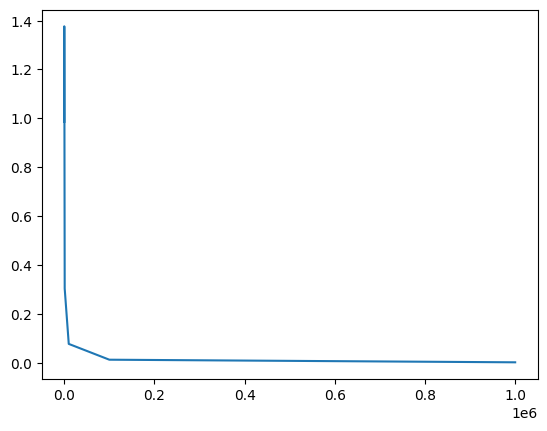

In [5]:

A=sample_covariance(500,5000)

def error_covariance(m,N):
    s=sample_covariance(m,N)
    temp=np.linspace(np.zeros(N),np.ones(N),N)
    temp=np.minimum(temp,temp.T)
    err=s-temp
    return np.linalg.norm(err)


N=10
mvec=[50,100,1000,10000,100000,1000000]


err=np.zeros_like(mvec,dtype=np.float32)
for i in range(len(mvec)):
    err[i]=error_covariance(mvec[i],N)
import matplotlib.pyplot as plt
plt.plot(mvec,err)


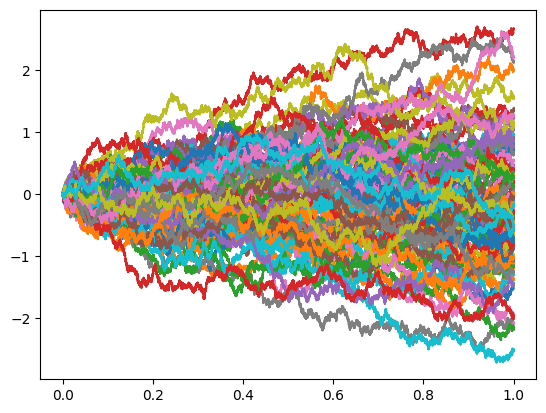

In [6]:

w=sample_wiener(100,100000)
t=np.linspace(0,1,100000)
for i in range(100):
    plt.plot(t,w[:,i])